In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [109]:
df = pd.read_csv('../data/alle_data_sligro.csv', sep=';')

In [110]:
#make new df with only relevant columns. Omzet_Sligro, jaar, Segment, Hoofdactiviteit

df_clean = df[['Omzet_Sligro', 'jaar', 'Segment', 'Hoofdactiviteit']]

#missing values delete rows

df_clean = df_clean.dropna()

In [111]:
df_clean

,Omzet_Sligro,jaar,Segment,Hoofdactiviteit
0,453,2025,Eten,Restaurant - fast casual
1,28,2025,Leisure,Speeltuin/-hal
2,55,2023,Eten,Fast food - snacks & frites
4,512,2024,Leisure,Casino
5,453,2025,Leisure,Casino
...,...,...,...,...
67819,19,2025,Slapen,Hotel/motel
67820,19,2025,Eten,Fast food - snacks & frites
67822,19,2025,Drinken,Bar/café
67823,19,2025,Reizen,Benzinestation


In [112]:
# remove rows where Segment is 'Werken', 'Zorgen', 'Not supported', 'Grossiers'

df_clean = df_clean[~df_clean['Segment'].isin(['Werken', 'Zorgen', 'Not supported', 'Grossiers'])]

In [113]:
# omzet per hoofdactiviteit count

df_clean['Hoofdactiviteit'].value_counts()

Hoofdactiviteit
Fast food - snacks & frites    9320
Benzinestation                 5916
Restaurant - social dining     5217
Restaurant - fast casual       3828
Camping/camperpark             3514
                               ... 
Slijterij                         3
Reform-/natuurwinkel              3
Zoetwarenspecialist               2
Cricket                           2
Groenten-/fruitspeciaalzaak       1
Name: count, Length: 75, dtype: int64

In [114]:
# value counts of Segment

df_clean['Segment'].value_counts()


Segment
Eten                21435
Sporten              9534
Slapen               6263
Reizen               6031
Leisure              4986
Drinken              1592
Leren                 955
Evenementen           924
Cateraars             878
Shoppen food          662
Shoppen non food      635
Name: count, dtype: int64

eten, sporten, slapen, reizen, leisure, drink, leren, evenementen, cateraars, shoppen food, schoppen non food

In [115]:
# give me a list of all the hoofdavtiviteiten but to what segment they belong to
hoofdactiviteit_segment = df_clean[['Hoofdactiviteit', 'Segment']].drop_duplicates().reset_index(drop=True)
hoofdactiviteit_segment

,Hoofdactiviteit,Segment
0,Restaurant - fast casual,Eten
1,Speeltuin/-hal,Leisure
2,Fast food - snacks & frites,Eten
3,Casino,Leisure
4,Camping/camperpark,Slapen
...,...,...
70,Slijterij,Shoppen food
71,Groenten-/fruitspeciaalzaak,Shoppen food
72,Zoetwarenspecialist,Shoppen food
73,Reform-/natuurwinkel,Shoppen food


In [116]:
# give me a color per segment; eten, sporten, slapen, reizen, leisure, drink, leren, evenementen, cateraars, shoppen food, schoppen non food.
activity_colors = {
    'eten': '#FF9999',
    'sporten': '#66B3FF',
    'slapen': '#99FF99',
    'reizen': '#FFCC99',
    'leisure': '#FFD700',
    'drink': '#FF69B4',
    'leren': '#8A2BE2',
    'evenementen': '#FF4500',
    'cateraars': '#2E8B57',
    'shoppen food': '#FF8C00',
    'shoppen non food': '#1E90FF'
}


/tmp/ipykernel_30436/586423217.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=omzet_compare, x='Segment_top5', y='2025', palette=bar_colors)


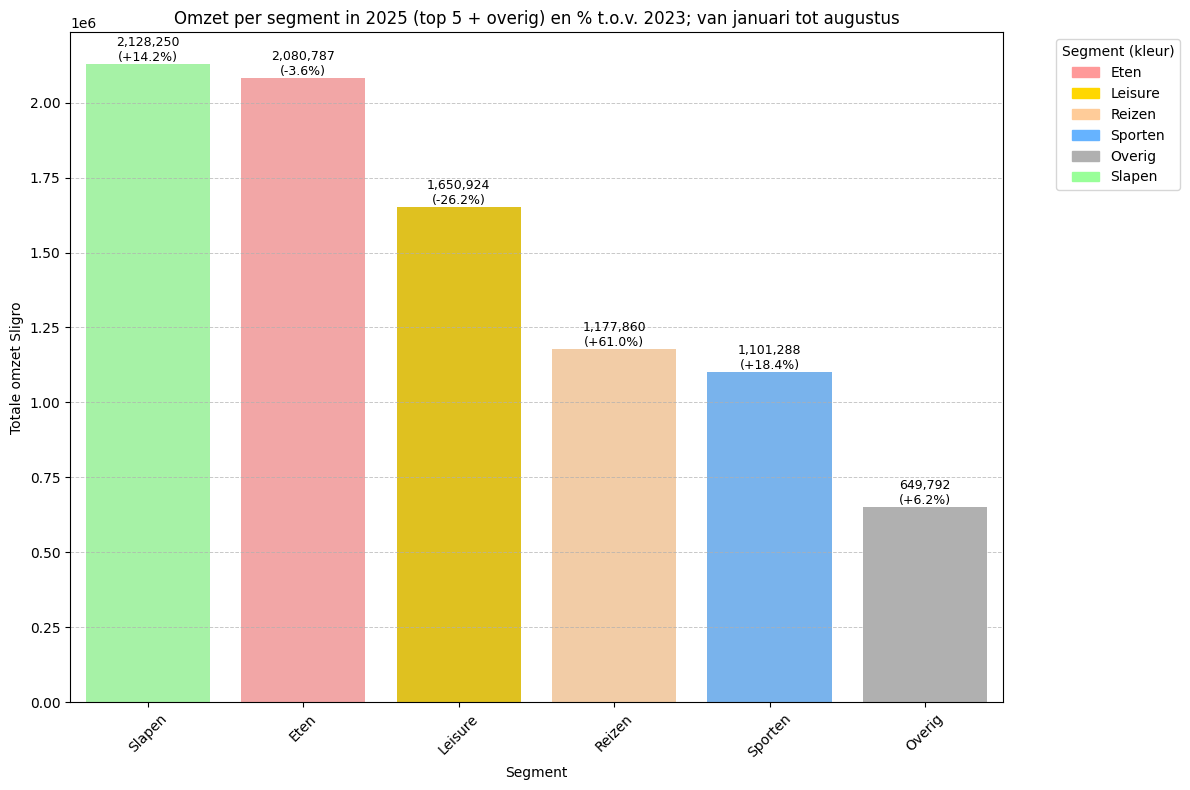

In [117]:
# 1. Omzet per segment in 2025 (top 5 + overig, kleur per segment, met legenda en % t.o.v. 2023)
# Data voor 2025 en 2023
jaar = 2025
segmenten_top5_2025 = df_clean[df_clean['jaar'] == jaar].groupby('Segment')['Omzet_Sligro'].sum().nlargest(5).index.tolist()
df_2025 = df_clean[df_clean['jaar'] == jaar].copy()
df_2023 = df_clean[df_clean['jaar'] == 2023].copy()
df_2025['Segment_top5'] = df_2025['Segment'].where(df_2025['Segment'].isin(segmenten_top5_2025), 'Overig')
df_2023['Segment_top5'] = df_2023['Segment'].where(df_2023['Segment'].isin(segmenten_top5_2025), 'Overig')
omzet_2025 = df_2025.groupby('Segment_top5')['Omzet_Sligro'].sum()
omzet_2023 = df_2023.groupby('Segment_top5')['Omzet_Sligro'].sum()
omzet_compare = pd.DataFrame({'2025': omzet_2025, '2023': omzet_2023})
omzet_compare = omzet_compare.fillna(0)
omzet_compare['perc_vs_2023'] = np.where(omzet_compare['2023'] > 0, 100 * (omzet_compare['2025'] - omzet_compare['2023']) / omzet_compare['2023'], np.nan)
omzet_compare = omzet_compare.sort_values('2025', ascending=False).reset_index()
# Segmentkleuren
activity_colors = {
    'Eten': '#FF9999',
    'Sporten': '#66B3FF',
    'Slapen': '#99FF99',
    'Reizen': '#FFCC99',
    'Leisure': '#FFD700',
    'Drink': '#FF69B4',
    'Leren': '#8A2BE2',
    'Evenementen': '#FF4500',
    'Cateraars': '#2E8B57',
    'Shoppen food': '#FF8C00',
    'Shoppen non food': '#1E90FF',
    'Overig': '#b0b0b0'
}
# Mapping van segment naar kleur (gebruik segmentnaam als key, anders grijs)
bar_colors = [activity_colors.get(seg, '#cccccc') for seg in omzet_compare['Segment_top5']]
plt.figure(figsize=(12,8))
bars = sns.barplot(data=omzet_compare, x='Segment_top5', y='2025', palette=bar_colors)
plt.title('Omzet per segment in 2025 (top 5 + overig) en % t.o.v. 2023; van januari tot augustus')
plt.ylabel('Totale omzet Sligro')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
for i, (v, p) in enumerate(zip(omzet_compare['2025'], omzet_compare['perc_vs_2023'])):
    if not np.isnan(p):
        plt.text(i, v, f'{v:,.0f}\n({p:+.1f}%)', ha='center', va='bottom', fontsize=9)
    else:
        plt.text(i, v, f'{v:,.0f}\n(n.v.t.)', ha='center', va='bottom', fontsize=9)
# Legenda genereren
import matplotlib.patches as mpatches
used_segments = list({seg for seg in omzet_compare['Segment_top5'] if seg in activity_colors})
legend_patches = [mpatches.Patch(color=activity_colors[seg], label=seg) for seg in used_segments]
plt.legend(handles=legend_patches, title='Segment (kleur)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_30436/3577008316.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=omzet_compare, x='Segment', y='2025', palette=bar_colors)


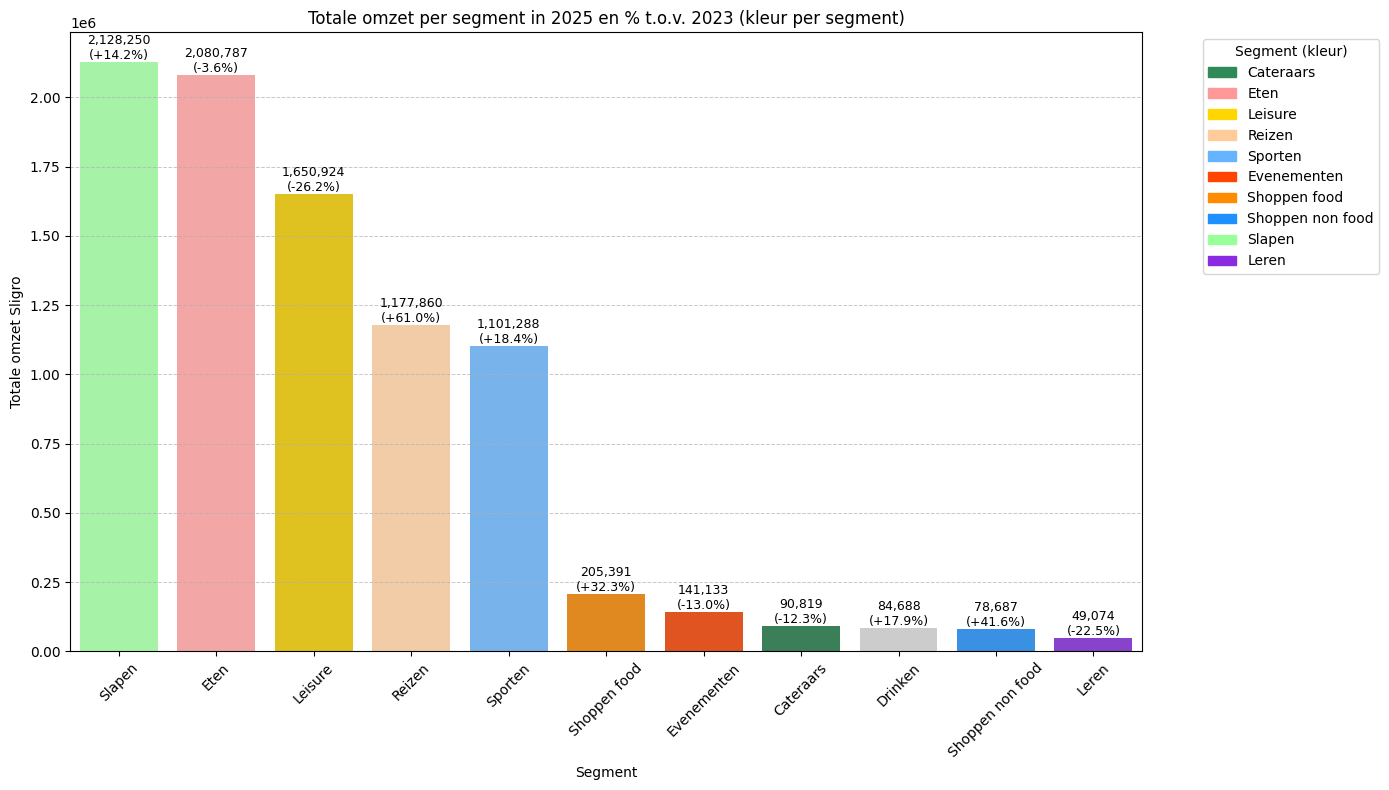

In [118]:
# 2. Omzet per segment in 2025 (alle segmenten, absolute omzet en % t.o.v. 2023, kleur per segment, met legenda)
# Data voor 2025 en 2023
omzet_2025 = df_clean[df_clean['jaar'] == 2025].groupby('Segment')['Omzet_Sligro'].sum()
omzet_2023 = df_clean[df_clean['jaar'] == 2023].groupby('Segment')['Omzet_Sligro'].sum()
omzet_compare = pd.DataFrame({'2025': omzet_2025, '2023': omzet_2023})
omzet_compare = omzet_compare.fillna(0)
omzet_compare['perc_vs_2023'] = np.where(omzet_compare['2023'] > 0, 100 * (omzet_compare['2025'] - omzet_compare['2023']) / omzet_compare['2023'], np.nan)
omzet_compare = omzet_compare.sort_values('2025', ascending=False).reset_index()
# Segmentkleuren
activity_colors = {
    'Eten': '#FF9999',
    'Sporten': '#66B3FF',
    'Slapen': '#99FF99',
    'Reizen': '#FFCC99',
    'Leisure': '#FFD700',
    'Drink': '#FF69B4',
    'Leren': '#8A2BE2',
    'Evenementen': '#FF4500',
    'Cateraars': '#2E8B57',
    'Shoppen food': '#FF8C00',
    'Shoppen non food': '#1E90FF',
    'Overig': '#b0b0b0'
}
# Mapping van segment naar kleur (gebruik segmentnaam als key, anders grijs)
bar_colors = [activity_colors.get(seg, '#cccccc') for seg in omzet_compare['Segment']]
plt.figure(figsize=(14,8))
bars = sns.barplot(data=omzet_compare, x='Segment', y='2025', palette=bar_colors)
plt.title('Totale omzet per segment in 2025 en % t.o.v. 2023 (kleur per segment)')
plt.ylabel('Totale omzet Sligro')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
for i, (v, p) in enumerate(zip(omzet_compare['2025'], omzet_compare['perc_vs_2023'])):
    if not np.isnan(p):
        plt.text(i, v, f'{v:,.0f}\n({p:+.1f}%)', ha='center', va='bottom', fontsize=9)
    else:
        plt.text(i, v, f'{v:,.0f}\n(n.v.t.)', ha='center', va='bottom', fontsize=9)
# Legenda genereren
import matplotlib.patches as mpatches
used_segments = list({seg for seg in omzet_compare['Segment'] if seg in activity_colors})
legend_patches = [mpatches.Patch(color=activity_colors[seg], label=seg) for seg in used_segments]
plt.legend(handles=legend_patches, title='Segment (kleur)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_30436/1904899703.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=top10, x='Hoofdactiviteit', y='2025', palette=bar_colors)


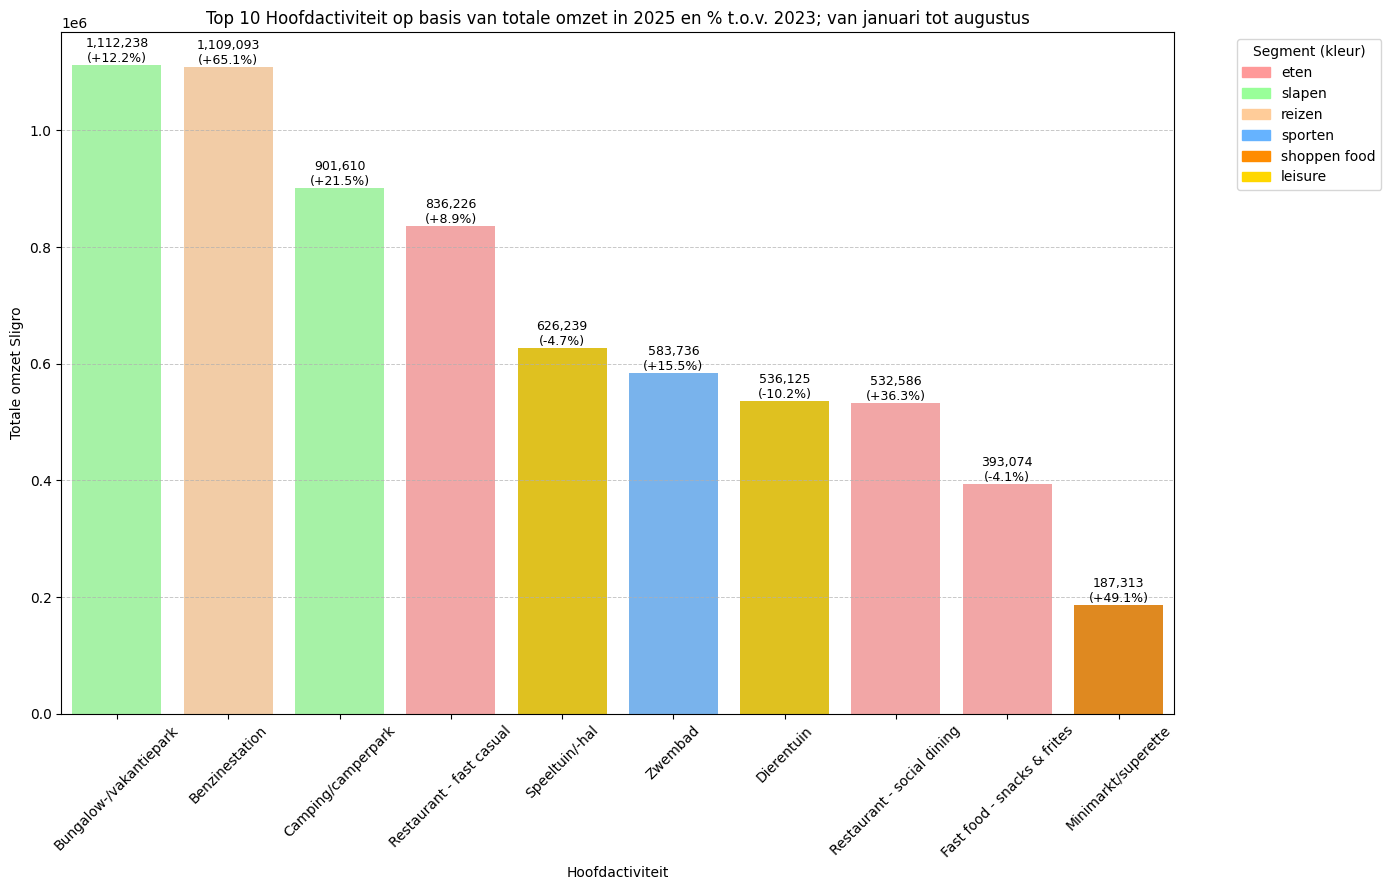

In [119]:
# 3. Top 10 Hoofdactiviteit op basis van totale omzet in 2025 en % t.o.v. 2023 (kleur per segment, met legenda)
# Data voor 2025 en 2023
omzet_2025 = df_clean[df_clean['jaar'] == 2025].groupby('Hoofdactiviteit')['Omzet_Sligro'].sum()
omzet_2023 = df_clean[df_clean['jaar'] == 2023].groupby('Hoofdactiviteit')['Omzet_Sligro'].sum()
omzet_compare = pd.DataFrame({'2025': omzet_2025, '2023': omzet_2023})
omzet_compare = omzet_compare.fillna(0)
omzet_compare['perc_vs_2023'] = np.where(omzet_compare['2023'] > 0, 100 * (omzet_compare['2025'] - omzet_compare['2023']) / omzet_compare['2023'], np.nan)
top10_labels = [
    'Bungalow-/vakantiepark',
    'Benzinestation',
    'Camping/camperpark',
    'Restaurant - fast casual',
    'Speeltuin/-hal',
    'Zwembad',
    'Dierentuin',
    'Restaurant - social dining',
    'Fast food - snacks & frites',
    'Minimarkt/superette'
]
top10 = omzet_compare.loc[top10_labels].reset_index()
# Mapping van hoofdactiviteit naar segment
segment_mapping = {
    'Bungalow-/vakantiepark': 'slapen',
    'Benzinestation': 'reizen',
    'Camping/camperpark': 'slapen',
    'Restaurant - fast casual': 'eten',
    'Speeltuin/-hal': 'leisure',
    'Zwembad': 'sporten',
    'Dierentuin': 'leisure',
    'Restaurant - social dining': 'eten',
    'Fast food - snacks & frites': 'eten',
    'Minimarkt/superette': 'shoppen food'
}
activity_colors = {
    'eten': '#FF9999',
    'sporten': '#66B3FF',
    'slapen': '#99FF99',
    'reizen': '#FFCC99',
    'leisure': '#FFD700',
    'drink': '#FF69B4',
    'leren': '#8A2BE2',
    'evenementen': '#FF4500',
    'cateraars': '#2E8B57',
    'shoppen food': '#FF8C00',
    'shoppen non food': '#1E90FF'
}
bar_segments = [segment_mapping.get(act, '') for act in top10['Hoofdactiviteit']]
bar_colors = [activity_colors.get(seg, '#cccccc') for seg in bar_segments]
plt.figure(figsize=(14,9))
bars = sns.barplot(data=top10, x='Hoofdactiviteit', y='2025', palette=bar_colors)
plt.title('Top 10 Hoofdactiviteit op basis van totale omzet in 2025 en % t.o.v. 2023; van januari tot augustus')
plt.ylabel('Totale omzet Sligro')
plt.xlabel('Hoofdactiviteit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
for i, (v, p) in enumerate(zip(top10['2025'], top10['perc_vs_2023'])):
    if not np.isnan(p):
        plt.text(i, v, f'{v:,.0f}\n({p:+.1f}%)', ha='center', va='bottom', fontsize=9)
    else:
        plt.text(i, v, f'{v:,.0f}\n(n.v.t.)', ha='center', va='bottom', fontsize=9)
# Legenda genereren
import matplotlib.patches as mpatches
used_segments = list({seg for seg in bar_segments if seg in activity_colors})
legend_patches = [mpatches.Patch(color=activity_colors[seg], label=seg) for seg in used_segments]
plt.legend(handles=legend_patches, title='Segment (kleur)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [120]:
# give me a list of the top 15 like in graph 3 but in text form

top15_list = top10['Hoofdactiviteit'].tolist()
top15_list


['Bungalow-/vakantiepark',
 'Benzinestation',
 'Camping/camperpark',
 'Restaurant - fast casual',
 'Speeltuin/-hal',
 'Zwembad',
 'Dierentuin',
 'Restaurant - social dining',
 'Fast food - snacks & frites',
 'Minimarkt/superette']